# Exploratory Data Analysis of Music Recommendation System

**Submitted By:** Debojyoti Choudhury

**Enrollment Number:** 40AIML137-21/2

**Programme:** Diploma in AI and ML

## The data

- The data is obtained from Kaggle [WSDM-KKBox's Music Recommendation Challenge](https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data).

- The data are in the zip format. I have downloaded all the data for this task in zip format using kaggle api and stored the zipped data in "./Data/Zipped" folder.

- The I unzipped the data and kept the csv files in the "./Data" folder.

## Importing the necessary libraries

In [1]:
import numpy as np                       # for fast processing of tabular data
import pandas as pd                      # data processing, CSV file I/O
import matplotlib.pyplot as plt          # for data visualization
import seaborn as sns                    # for data visualization

## Reading the files in csv format and getting preliminary information

### train.csv file

In [2]:
train_data = pd.read_csv("../Data/train.csv", sep = ',')

#### Printing the first few rows

In [3]:
train_data.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


#### Getting the info of the train_data DataFrame

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


The train.csv files contains ```7377418``` (approx 7.4 million) records and ```6``` columns

As obtained from the Kaggle, the train.csv file hence train_data dataframe will contain following columns 

- **msno:** identification of the user

- **song_id:** identification of the song

- **source_system_tab:** the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab ```my library``` contains functions to manipulate the local storage, and tab ```search``` contains functions relating to search.

- **source_screen_name:** name of the layout a user sees.

- **source_type:** an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

- **target:** this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise.

#### Anlysis of NULL values

In [26]:
train_data.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [27]:
100 * train_data.isna().sum() / len(train_data)

msno                  0.000000
song_id               0.000000
source_system_tab     0.336825
source_screen_name    5.622618
source_type           0.291959
target                0.000000
dtype: float64

- source_screen_name has maximum number of missing data (approx 5.62% data are missing in this column)

#### How many unique users are there in the training dataset?

In [5]:
print(f"There are {train_data['msno'].nunique()} numbers of unique users in the training dataset")

There are 30755 numbers of unique users in the training dataset


#### How many unique songs are there in the training dataset?

In [6]:
print(f"There are {train_data['song_id'].nunique()} numbers of unique songs in the training dataset")

There are 359966 numbers of unique songs in the training dataset


#### Analysis of target variable

We ask the following questions:

- How many times do the user listen to the song again? (i.e. what % of the train data has target = 1)

- How many times there is no repeated listening event? (i.e. what % of the train data has target = 0)

In [7]:
number_of_training_data = len(train_data)

number_of_data_with_target_1 = len(train_data[train_data['target']==1])

number_of_data_with_target_0 = len(train_data[train_data['target']==0])

print(f"Songs repeated as percentage of training data: {round(100*number_of_data_with_target_1/number_of_training_data,2)}%")

print(f"Songs didn't repeat as percentage of training data: {round(100*number_of_data_with_target_0/number_of_training_data,2)}%")

Songs repeated as percentage of training data: 50.35%
Songs didn't repeat as percentage of training data: 49.65%


**From the above information it is clear that the dataset is balanced**

#### Which songs have repeated most

Top-20 songs which have repeated most

In [8]:
repeated = train_data[train_data['target']==1]

In [9]:
repeated['song_id'].value_counts()[:20]

reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=     9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=     9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=     9004
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=     8787
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=     8780
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=     8403
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=     8112
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=     7903
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=     7725
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=     7608
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     7224
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     7061
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     6901
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     6879
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     6536
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     6399
OaEbZ6TJ1NePtNUeEgWsvFLeopkS

#### Which users are responsible for most number of repeats

In [10]:
repeated['msno'].value_counts()[:20]

o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    3288
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    2818
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    2791
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    2069
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    1978
4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=    1814
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    1806
uCDJmSDTzA5PpnYGqKvNmFbwBIoS3jIXFbO5YfoCv/Y=    1794
1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=    1737
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    1735
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    1715
HVcWdf8CEo9s6qwt5V7TpoPYJfRlQSTA6b7kxEAImpc=    1710
mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=    1607
V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=    1602
LThaiVqGGnVTPmTcmwN/LLo4fVb5dzkduzd7s1SgzIA=    1578
EZmIP7zKgqKwpEHnuDjRIkzCmcLNlHn4hkiglZ5LxK8=    1539
00qmlWC3H/cjf2Ig1li5xIO0VNDRgBX0f9ilouDBEZs=    1533
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    1503
K7obY5lUlZTd6a/byE9NG/e7Q/dlgHfppLbYk8OL7os=  

#### Different source_system_tab and their counts

In [11]:
train_data['source_system_tab'].nunique()

8

There are `8` unique `source_system_tab`. They are following:

In [12]:
train_data['source_system_tab'].unique()

array(['explore', 'my library', 'search', 'discover', nan, 'radio',
       'listen with', 'notification', 'settings'], dtype=object)

We are going to count the number of each of source_system_tab

In [13]:
train_data['source_system_tab'].value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

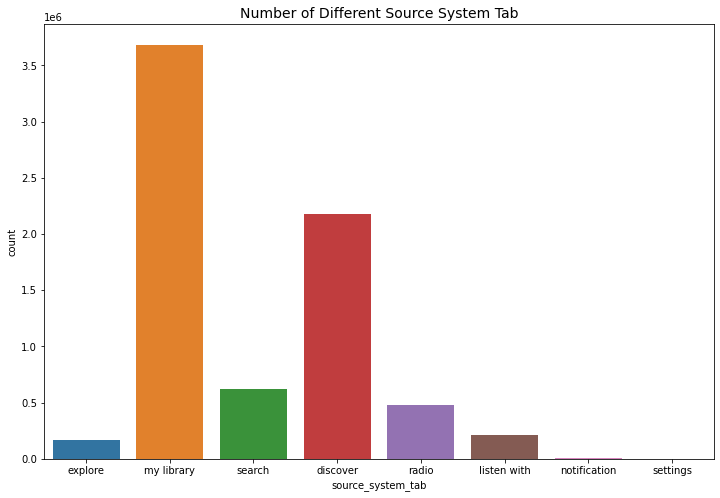

In [14]:
plt.figure(figsize=(12,8))

sns.countplot(x='source_system_tab', data=train_data)

plt.title('Number of Different Source System Tab',fontsize=14)

plt.show()

#### Different source_screen_name and their counts

In [15]:
train_data['source_screen_name'].nunique()

20

There are `20` unique `source screen name` and these are:

In [16]:
train_data['source_screen_name'].unique()

array(['Explore', 'Local playlist more', nan, 'My library',
       'Online playlist more', 'Album more', 'Discover Feature',
       'Unknown', 'Discover Chart', 'Radio', 'Artist more', 'Search',
       'Others profile more', 'Search Trends', 'Discover Genre',
       'My library_Search', 'Search Home', 'Discover New',
       'Self profile more', 'Concert', 'Payment'], dtype=object)

In [17]:
train_data['source_screen_name'].value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

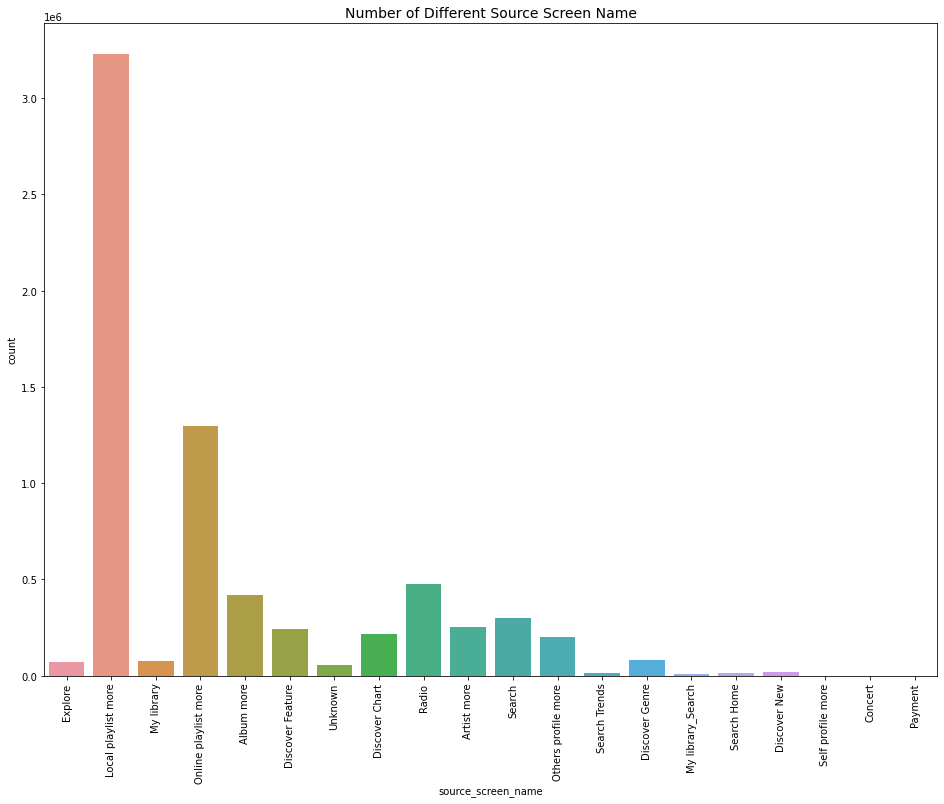

In [18]:
plt.figure(figsize=(16,12))

sns.countplot(x = 'source_screen_name', data = train_data)

plt.title('Number of Different Source Screen Name',fontsize=14)

ax = plt.gca()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

#### Different source type

In [19]:
train_data['source_type'].nunique()

12

In [20]:
train_data['source_type'].unique()

array(['online-playlist', 'local-playlist', 'local-library',
       'top-hits-for-artist', 'album', nan, 'song-based-playlist',
       'radio', 'song', 'listen-with', 'artist', 'topic-article-playlist',
       'my-daily-playlist'], dtype=object)

In [21]:
train_data['source_type'].value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

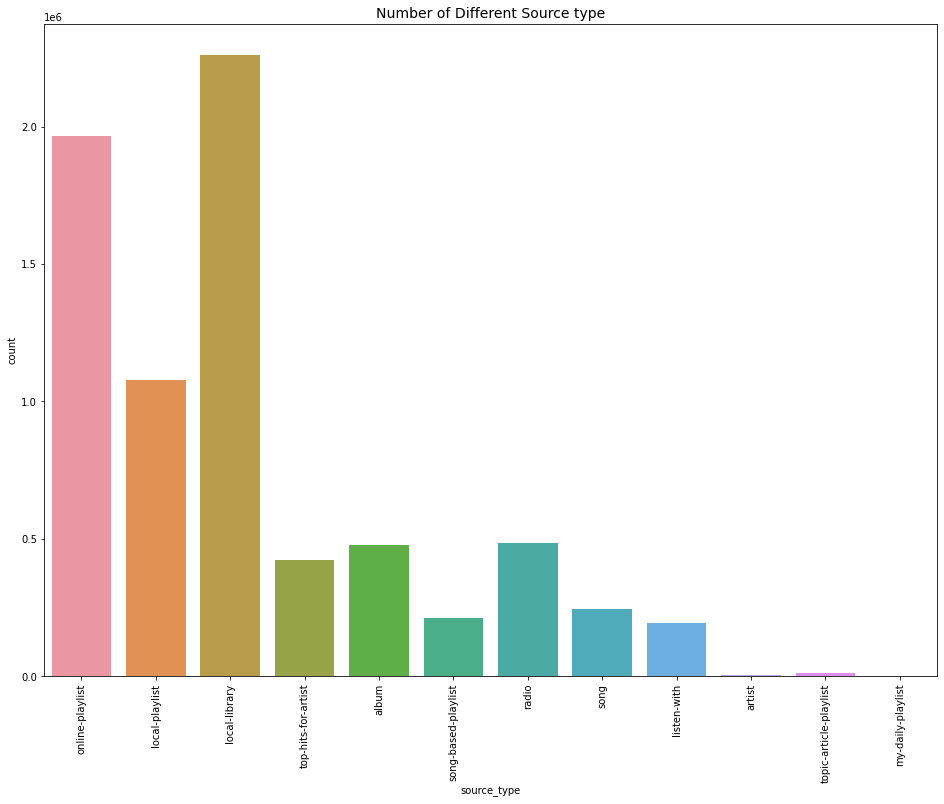

In [22]:
plt.figure(figsize=(16,12))

sns.countplot(x = 'source_type', data = train_data)

plt.title('Number of Different Source type',fontsize=14)

ax = plt.gca()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

### members.csv file

In [46]:
members_data = pd.read_csv("../Data/members.csv", sep=',', parse_dates=True)

#### Printing the first few rows

In [47]:
members_data.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


#### Getting the info of members_data DataFrame

In [48]:
members_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


The `members.csv` or the `members_data` DataFrame contains total `34403` records. (Note: There are `30755` numbers of distinct users in the data) and `7` columns. It contains information regarding the user.

The columns are following:

- **msno:** Identification of the user

- **city:** The integer showing city number

- **bd:** age of the user. Note that this column has outlier.

- **gender:** Gender of the user

- **registered_via:** Method of registration

- **registration_init_time:** Date of registration in the format %Y%m%d

- **expiration_date:** Date of expiry in the format %Y%m%d

Note that columns `registration_init_time` and `expiration_date` should be in date format (not int)

#### converting date column to pandas date-time

In [49]:
members_data['registration_init_time'] = members_data['registration_init_time'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
members_data['expiration_date'] = members_data['expiration_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [50]:
members_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


In [51]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


#### Anlysis of null values

In [52]:
100 * members_data.isna().sum() / len(members_data)

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    57.849606
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

`gender` column has high number of null values. (57.85%)

#### How many unique cities are there

In [53]:
members_data['city'].nunique()

21

There are `21` unique cities in the data and those are

In [58]:
sorted(members_data['city'].unique())

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

#### Number of users per city

In [59]:
members_data['city'].value_counts()

1     19445
13     3395
5      2634
4      1732
15     1525
22     1467
6       913
14      708
12      491
9       309
8       289
11      285
18      259
10      216
21      213
3       204
17      152
7        93
16       35
20       27
19       11
Name: city, dtype: int64

#### boxplot of bd column

as we know any value/point outside the box is consider as outliers

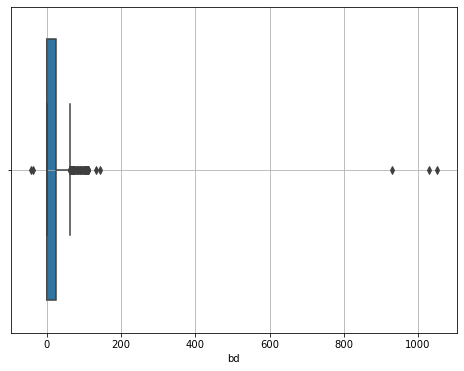

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(x="bd",data=members_data)
plt.grid()
plt.show()

So most of the members have 0 age (clearly this information is not useful to us for building models).  

#### registration_init_time

In [83]:
members_data['registration_init_time'].value_counts().sort_index()

2004-03-26     2
2004-03-27    11
2004-03-28    13
2004-03-29     4
2004-03-30     7
              ..
2017-02-24    64
2017-02-25    91
2017-02-26    75
2017-02-27    93
2017-02-28    74
Name: registration_init_time, Length: 3862, dtype: int64

Hence, registration_init_time doesn't have any outliers

#### histogram of registration_init_time

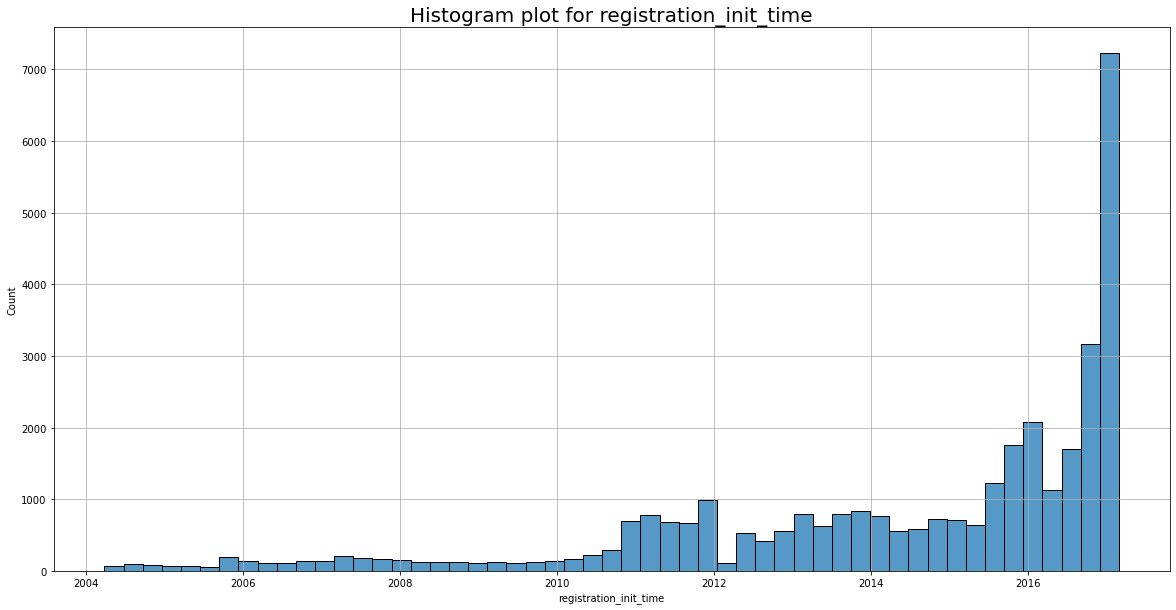

In [67]:
plt.figure(figsize=(20,10))

sns.histplot(data=members_data, x='registration_init_time')

plt.title('Histogram plot for registration_init_time',fontsize=20)

plt.grid()
  
plt.show() 

#### expiration_date

In [84]:
members_data['expiration_date'].value_counts().sort_index()

1970-01-01    1
2004-10-15    1
2004-10-16    1
2004-10-20    1
2005-06-10    1
             ..
2019-09-21    1
2019-12-07    1
2019-12-29    1
2020-01-22    1
2020-10-17    1
Name: expiration_date, Length: 1484, dtype: int64

It contains one outlier '1970-01-01'

#### histogram of expiration_date

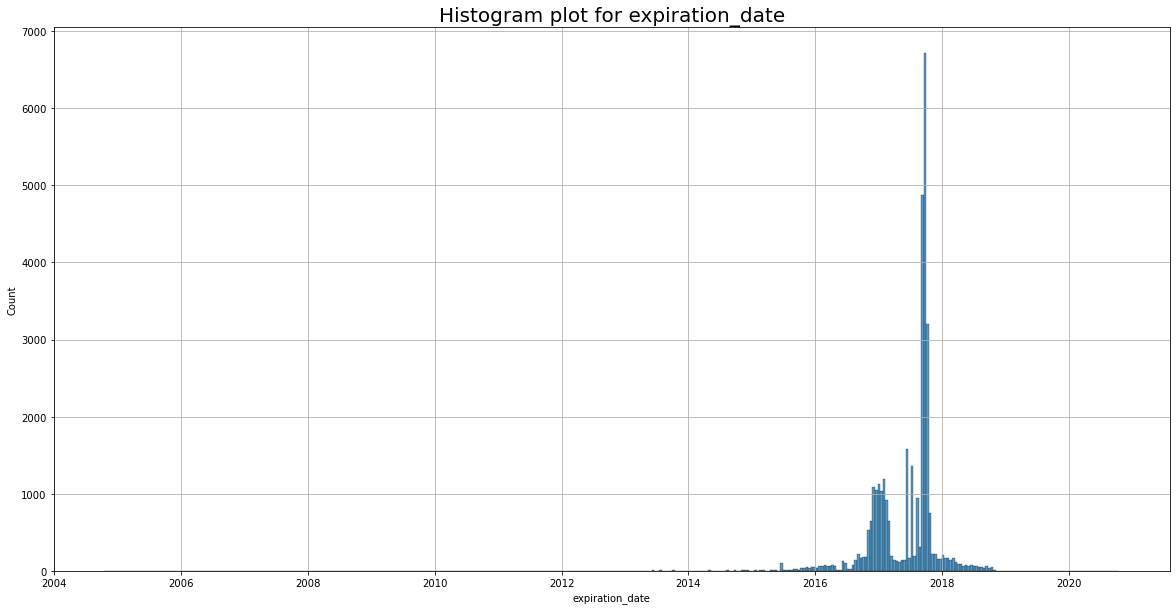

In [85]:
plt.figure(figsize=(20,10))

data = members_data[members_data['expiration_date'] !=pd.to_datetime('19700101',format="%Y%m%d")]

sns.histplot(data=data, x='expiration_date')

plt.title('Histogram plot for expiration_date',fontsize=20)

plt.grid()
  
plt.show()